In [29]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing

In [30]:
# import Housing.csv
df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [78]:
df = df.replace(to_replace = "yes", value = 1)
df = df.replace(to_replace = "no", value = 0) 

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,NaN
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,NaN
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,NaN
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,NaN


In [79]:
scaler = MinMaxScaler()

# transform data
scaled_df = scaler.fit_transform(df)

scaled_df 

array([[1.        , 0.39656357, 0.6       , ..., 0.66666667, 1.        ,
               nan],
       [0.90909091, 0.5024055 , 0.6       , ..., 1.        , 0.        ,
               nan],
       [0.90909091, 0.57113402, 0.4       , ..., 0.66666667, 1.        ,
               nan],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
               nan],
       [0.        , 0.08659794, 0.4       , ..., 0.        , 0.        ,
               nan],
       [0.        , 0.15120275, 0.4       , ..., 0.        , 0.        ,
               nan]])

In [80]:
# split into train and test
df_train, df_test = train_test_split(df , 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)
print(len(df_train))
print(len(df_test))

381
164


In [100]:
x_train = df_train[["area","bedrooms"]]
x_train=x_train.to_numpy().reshape(-1,2)

y_train=df_train["price"]
y_train=y_train.to_numpy().reshape(-1,1)

x_test = df_test[['area','bedrooms']]
x_test =x_test.to_numpy().reshape(-1,2)

y_test=df_test["price"]
y_test=y_test.to_numpy().reshape(-1,1)

print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

(164, 2)
(164, 1)
(381, 2)
(381, 1)


In [101]:
#train model
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

MSE= mean_squared_error(y_train, y_pred)
R2= r2_score(y_train, y_pred)

print (MSE)
print (R2)



1903240119211.206
0.3941745439501948


In [102]:
poly = PolynomialFeatures(degree=6)
poly_features = poly.fit_transform(x_train.reshape(-1, 2))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y_train)

y_pred = poly_reg_model.predict(poly_features)

r2= r2_score(y_train, y_pred)

print(r2)
    

0.502186930236252


alpha: 0.1 Train Score: 0.39 Test Score: 0.33
alpha: 11.2 Train Score: 0.39 Test Score: 0.33
alpha: 22.3 Train Score: 0.39 Test Score: 0.33
alpha: 33.4 Train Score: 0.39 Test Score: 0.33
alpha: 44.5 Train Score: 0.39 Test Score: 0.33
alpha: 55.6 Train Score: 0.39 Test Score: 0.32
alpha: 66.7 Train Score: 0.39 Test Score: 0.32
alpha: 77.8 Train Score: 0.39 Test Score: 0.32
alpha: 88.9 Train Score: 0.39 Test Score: 0.32
alpha: 100.0 Train Score: 0.38 Test Score: 0.32


Text(0.5, 1.0, 'Ridge regression model with polynomial degree =1')

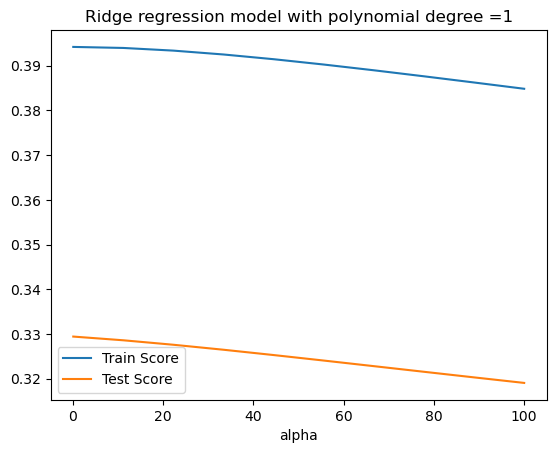

In [107]:
#model scores
train_scores=[]
test_scores=[]

#train model

alphas = np.linspace(0.1,100,num=10)

for i in alphas:

    poly = PolynomialFeatures(degree=1)
    poly_features = poly.fit_transform(x_train.reshape(-1, 2))
    
    model = Ridge(alpha = i)
    model.fit(poly_features, y_train)
    
    y_pred = model.predict(poly_features)
    R2_train= r2_score(y_train, y_pred)

    #test model    
    
    poly_test_features = poly.fit_transform(x_test.reshape(-1, 2))

    y_test_pred = model.predict(poly_test_features)
    
    R2_test= r2_score(y_test, y_test_pred)

    train_scores.append(R2_train)
    test_scores.append(R2_test)
    
    print("alpha:",round(i,1),"Train Score:",round(R2_train,2),"Test Score:",round(R2_test,2))
    

#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-', label='Train Score')
plt.plot(alphas, test_scores, '-', label='Test Score')
plt.xlabel("alpha")
plt.legend()
plt.title("Ridge regression model with polynomial degree =1")

alpha: 0.1 Train Score: 0.47 Test Score: 0.34
alpha: 2.3 Train Score: 0.47 Test Score: 0.34
alpha: 4.5 Train Score: 0.47 Test Score: 0.34
alpha: 6.7 Train Score: 0.47 Test Score: 0.35
alpha: 8.9 Train Score: 0.47 Test Score: 0.35
alpha: 11.2 Train Score: 0.47 Test Score: 0.35
alpha: 13.4 Train Score: 0.47 Test Score: 0.35
alpha: 15.6 Train Score: 0.47 Test Score: 0.35
alpha: 17.8 Train Score: 0.47 Test Score: 0.35
alpha: 20.0 Train Score: 0.47 Test Score: 0.35


Text(0.5, 1.0, 'Ridge regression model with polynomial degree =2')

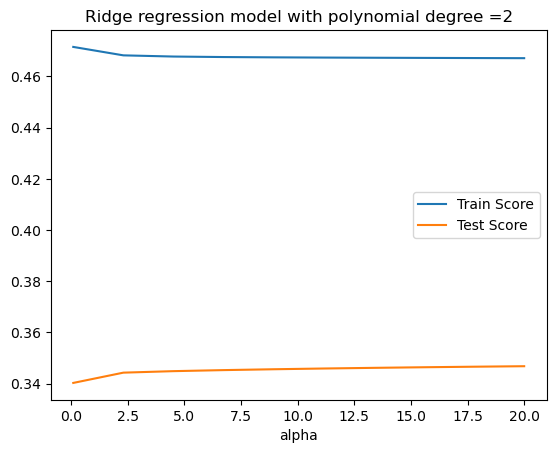

In [116]:
#model scores
train_scores=[]
test_scores=[]

#train model

alphas = np.linspace(0.1,20,num=10)

for i in alphas:

    poly = PolynomialFeatures(degree=3)
    poly_features = poly.fit_transform(x_train)
    
    model = Ridge(alpha = i)
    model.fit(poly_features, y_train)
    
    y_pred = model.predict(poly_features)
    R2_train= r2_score(y_train, y_pred)

    #test model    

    y_test_pred = model.predict(poly.fit_transform(x_test))
    R2_test= r2_score(y_test, y_test_pred)

    train_scores.append(R2_train)
    test_scores.append(R2_test)
    
    print("alpha:",round(i,1),"Train Score:",round(R2_train,2),"Test Score:",round(R2_test,2))
    
#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-', label='Train Score')
plt.plot(alphas, test_scores, '-', label='Test Score')
plt.xlabel("alpha")
plt.legend()
plt.title("Ridge regression model with polynomial degree =2")